In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data into a DataFrame
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
# Display DataFrame
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
# Display the first few rows of the DataFrame
print(data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [4]:
#Explore the data
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


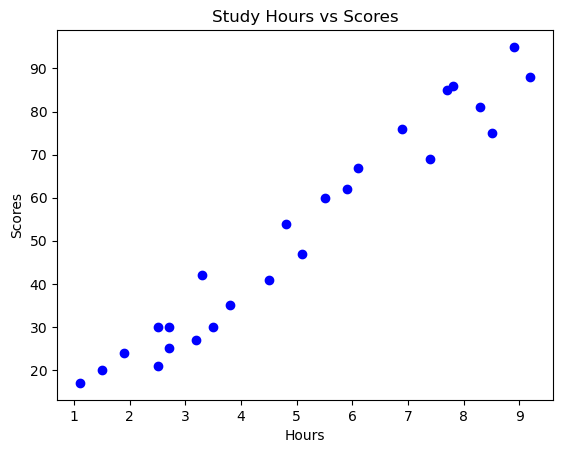

In [5]:
# Visualize the relationship between study hours and scores
plt.scatter(data['Hours'], data['Scores'],color='blue')
plt.title('Study Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Hours']], data['Scores'], test_size=0.2, random_state=42)

In [7]:
X_train

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [8]:
y_train

9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [9]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Evaluate the model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 5.608461065868858
Test RMSE: 4.352380006653288


In [11]:
# Predict the score for 9.25 hours/day of study
new_hours = [[9.25]]
predicted_score = model.predict(new_hours)
print("Predicted Score for 9.25 hours of study:", predicted_score[0])

Predicted Score for 9.25 hours of study: 92.38611528261494


C:\Users\Diya\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


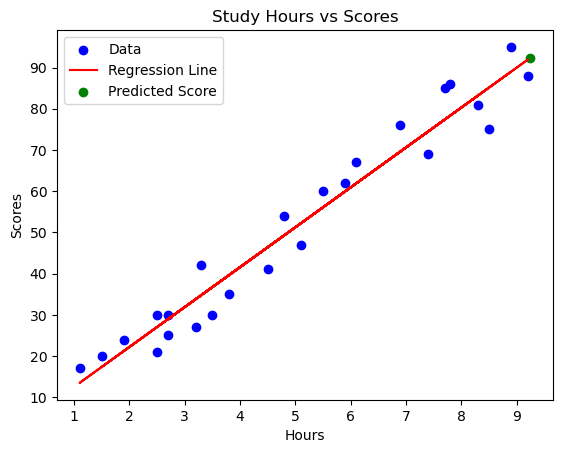

In [12]:
# Plot the data points
plt.scatter(data['Hours'], data['Scores'], label='Data',color='blue')

# Plot the regression line
plt.plot(data['Hours'], model.predict(data[['Hours']]), color='red', label='Regression Line')

# Plot the predicted score for 9.25 hours of study
plt.scatter(9.25, predicted_score, color='green', label='Predicted Score')

plt.title('Study Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()